## ARIMA

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from statsmodels.tsa.stattools import adfuller
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

In [2]:
df = pd.read_csv('C:\\Users\\39339\\OneDrive\\Desktop\\Tesi\\Dataset Finali\\Provincia_Cagliari.csv', 
                 parse_dates = ['mese'])

In [3]:
df['Month']=df['anno'].astype(str)+'-'+df['mese'].astype(str)

In [4]:
print(df['presenze'].isnull().sum())
ds = df.dropna(subset=['presenze','mese'])
print(ds['presenze'].isnull().sum())

0
0


In [5]:
ds

,anno,mese,provincia,presenze,Month
0,2018,1,Cagliari,34637.0,2018-1
1,2018,2,Cagliari,35341.0,2018-2
2,2018,3,Cagliari,56852.0,2018-3
3,2018,4,Cagliari,75258.0,2018-4
4,2018,5,Cagliari,129320.0,2018-5
5,2018,6,Cagliari,202543.0,2018-6
6,2018,7,Cagliari,255701.0,2018-7
7,2018,8,Cagliari,293724.0,2018-8
8,2018,9,Cagliari,201933.0,2018-9
9,2018,10,Cagliari,101822.0,2018-10


## Si effettua il test di fuller per capire se la serie sia stazionaria o meno

In [6]:
result = adfuller(df.presenze.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.535798
p-value: 0.000169


In [7]:
ds = df[['Month','presenze']].copy()

In [8]:
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
y = ds.set_index(['Month'])
y.head(5)

,presenze
Month,
2018-1,34637.0
2018-2,35341.0
2018-3,56852.0
2018-4,75258.0
2018-5,129320.0


In [10]:
import statistics
media= round(statistics.mean(y['presenze'])) 
lista=[]
for item in range (0,len(y)):
    lista.append(media)

## Analisi preliminare del dataset

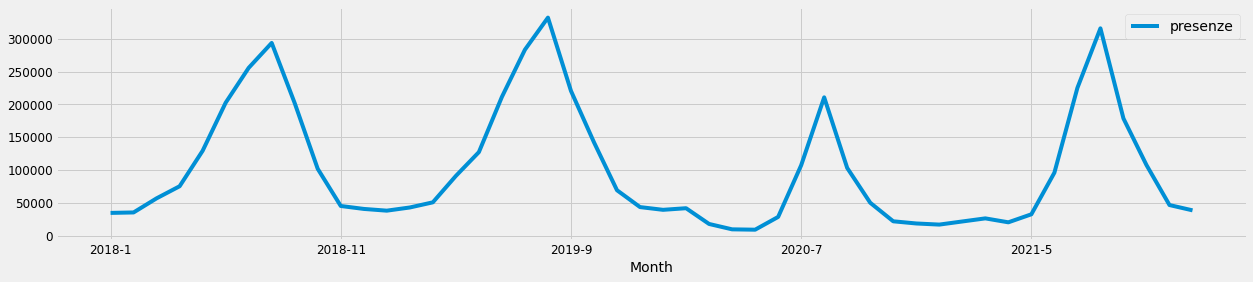

In [11]:
y.plot(figsize=(19, 4))

plt.show()

### DIFFERENCING

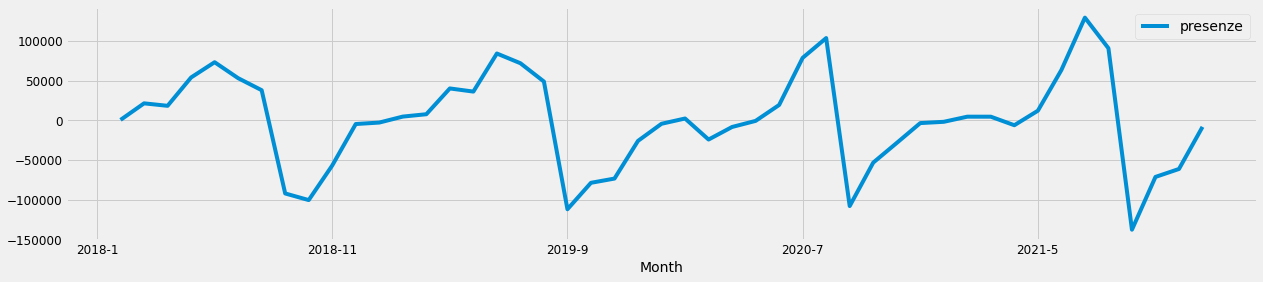

In [12]:
data=y.diff(periods=1)
data.plot(figsize=(19, 4))
plt.show()

In [13]:
differenced_data = data['presenze'].dropna()
result = adfuller(differenced_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.143262
p-value: 0.000011


In [14]:
print(len(y)*0.9)

43.2


#### Si imposta il seasonal decompose per capire la presenza di trend e stagionalità, così come si analizza l'andamento dei residui. SE vi è un nesso tra l'osservazione t e t-1, si è in presenza di un trend.

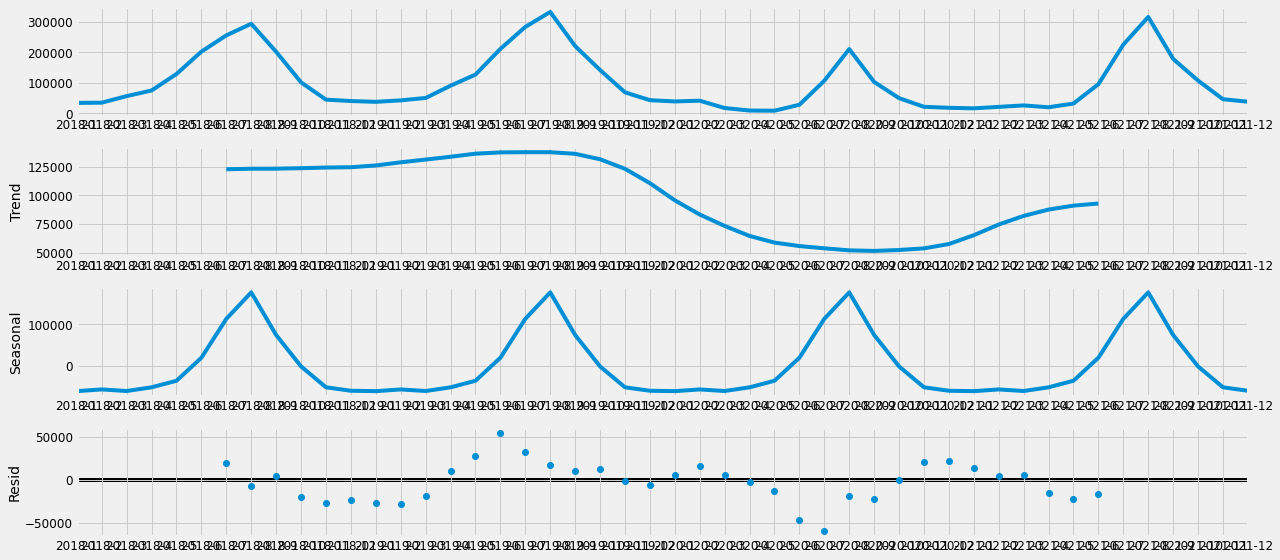

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive',period=12)
fig = decomposition.plot()
plt.show()

## Si addestra il modello ARIMA, in questo caso il modello ARMA, essendo la distribuzione non da differenziare

In [16]:
import pmdarima as pm

# Stima i parametri del modello ARIMA
stepwise_fit = pm.auto_arima(y, start_p=6, start_q=0,
                              test='adf',
                              max_p=20, max_q=20, m=12,
                              d=None, seasonal=True,
                              start_P=0, D=0, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

# Stampa i parametri stimati
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(6,0,0)(0,0,1)[12] intercept   : AIC=1167.231, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1236.602, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1175.434, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1202.928, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1273.700, Time=0.05 sec
 ARIMA(6,0,0)(0,0,0)[12] intercept   : AIC=1176.868, Time=0.17 sec
 ARIMA(6,0,0)(1,0,1)[12] intercept   : AIC=1169.048, Time=0.50 sec
 ARIMA(6,0,0)(0,0,2)[12] intercept   : AIC=1166.126, Time=0.51 sec
 ARIMA(6,0,0)(1,0,2)[12] intercept   : AIC=1168.057, Time=0.60 sec
 ARIMA(5,0,0)(0,0,2)[12] intercept   : AIC=1164.359, Time=0.43 sec
 ARIMA(5,0,0)(0,0,1)[12] intercept   : AIC=1165.439, Time=0.28 sec
 ARIMA(5,0,0)(1,0,2)[12] intercept   : AIC=1166.330, Time=0.54 sec
 ARIMA(5,0,0)(1,0,1)[12] intercept   : AIC=1167.186, Time=0.41 sec
 ARIMA(4,0,0)(0,0,2)[12] intercept   : AIC=1162.900, Time=0.34 sec
 ARIMA(4,0,0)(0,0,1

In [17]:
train= y[:40]
test=y[40:]
print(len(train),len(test))

40 8


In [18]:
import pmdarima as pm

# Stima i parametri del modello ARIMA
stepwise_fit = pm.auto_arima(train, start_p=8, start_q=8,
                              test='adf',
                              max_p=20, max_q=20, m=12,
                              d=None, seasonal=True,
                              start_P=0, D=0, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

# Stampa i parametri stimati
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(8,0,8)(0,0,1)[12] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1029.521, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=973.793, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1003.500, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1058.550, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=987.095, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=975.591, Time=0.20 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=974.849, Time=0.14 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=975.657, Time=0.12 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1026.560, Time=0.08 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=963.534, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=969.506, Time=0.08 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=964.893, Time=0.29 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   

In [19]:
print(len(y))

48


In [20]:
stepwise_fit

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [21]:
train.presenze

Month
2018-1      34637.0
2018-2      35341.0
2018-3      56852.0
2018-4      75258.0
2018-5     129320.0
2018-6     202543.0
2018-7     255701.0
2018-8     293724.0
2018-9     201933.0
2018-10    101822.0
2018-11     45209.0
2018-12     40714.0
2019-1      38063.0
2019-2      42913.0
2019-3      50742.0
2019-4      90986.0
2019-5     127279.0
2019-6     211433.0
2019-7     283375.0
2019-8     332290.0
2019-9     220651.0
2019-10    142258.0
2019-11     69192.0
2019-12     43514.0
2020-1      39340.0
2020-2      41790.0
2020-3      17793.0
2020-4       9592.0
2020-5       9049.0
2020-6      28502.0
2020-7     107209.0
2020-8     210784.0
2020-9     103147.0
2020-10     50118.0
2020-11     21845.0
2020-12     18534.0
2021-1      16831.0
2021-2      21583.0
2021-3      26302.0
2021-4      20300.0
Name: presenze, dtype: float64

In [22]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")


p_values=range(0,10)
d_values = range(0, 2)
q_values = range(0, 5)
MSE=[]
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            warnings.filterwarnings("ignore")
            model = ARIMA(train, order=order).fit()
            predictions = model.predict(start=len(train), end=len(train) + len(test)-1)
            error = mean_squared_error(test, predictions)
            MSE.append(error)
            if error==min(MSE):
                print('ARIMA%s MSE=%.3f' % (order,min(MSE)))

ARIMA(0, 0, 0) MSE=10178136612.313
ARIMA(0, 0, 1) MSE=9816280129.558
ARIMA(0, 0, 2) MSE=9787375226.332
ARIMA(2, 0, 0) MSE=9075248045.559
ARIMA(2, 0, 1) MSE=8751183044.101
ARIMA(2, 0, 2) MSE=7956144336.143
ARIMA(2, 0, 3) MSE=7895049902.660
ARIMA(2, 0, 4) MSE=3990759675.488
ARIMA(7, 0, 2) MSE=3012712181.271
ARIMA(8, 0, 4) MSE=2930088387.144
ARIMA(9, 1, 4) MSE=2376698601.248


In [23]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train, order=(8,0,4))
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               presenze   No. Observations:                   40
Model:                 ARIMA(8, 0, 4)   Log Likelihood                -474.679
Date:                Sat, 04 Feb 2023   AIC                            977.358
Time:                        12:09:27   BIC                           1001.002
Sample:                    01-01-2018   HQIC                           985.907
                         - 04-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.671e+04   2.79e+04      3.466      0.001     4.2e+04    1.51e+05
ar.L1          0.6814      0.755      0.903      0.367      -0.798       2.161
ar.L2          0.0505      1.085      0.047      0.9

In [24]:
print(result)

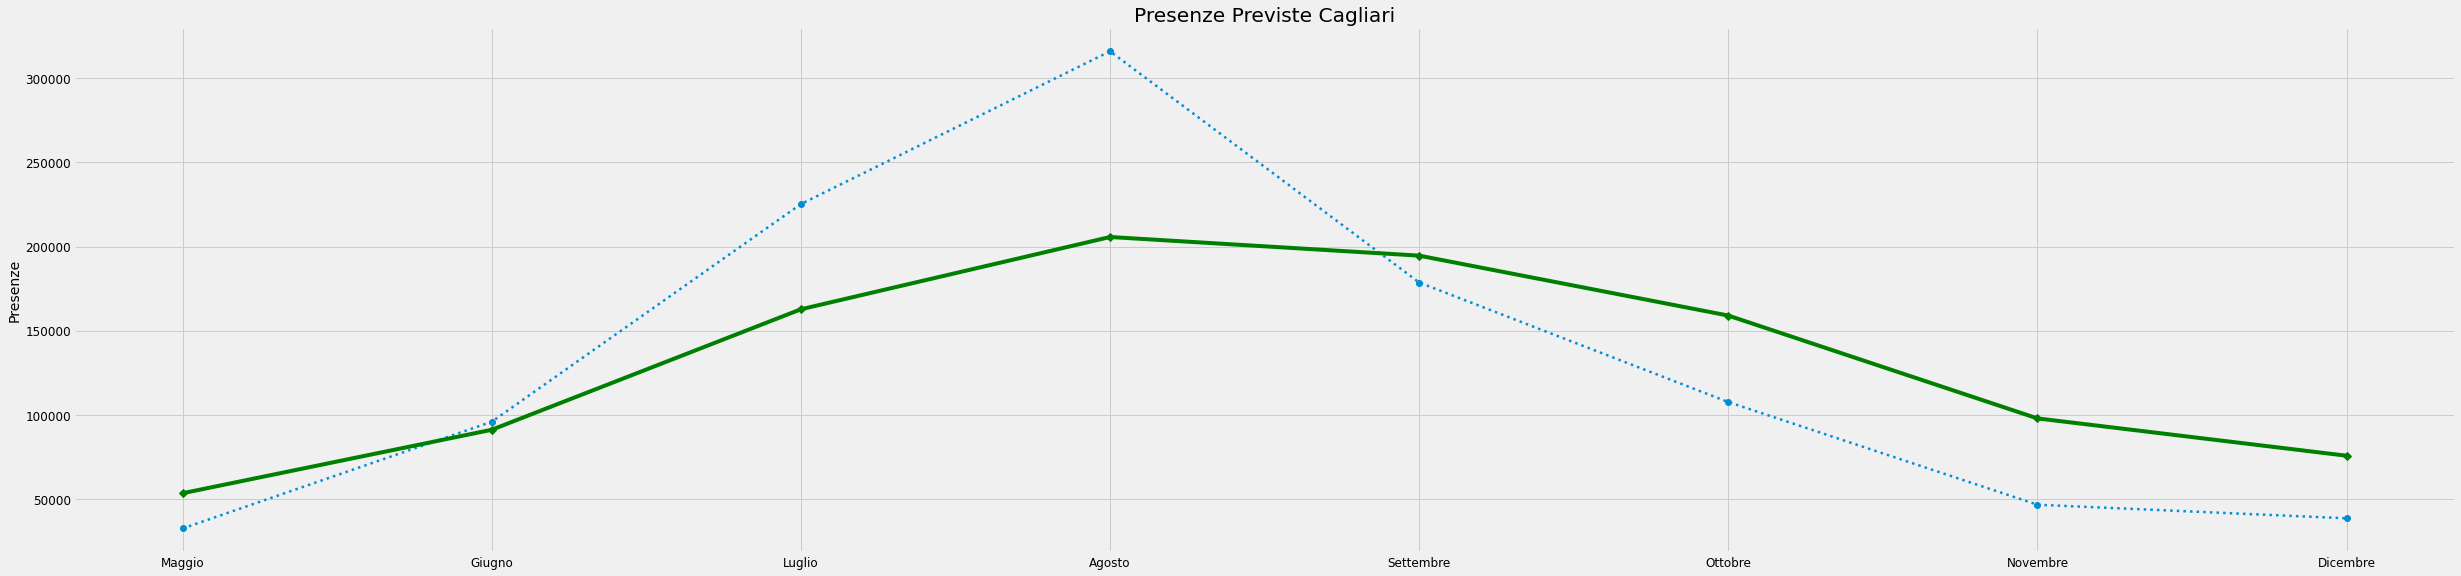

In [25]:
x=[ 'Maggio', 'Giugno', 'Luglio', 'Agosto'
                               , 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']


plt.figure(figsize=(38, 9))
plt.title('Presenze Previste Cagliari')
plt.ylabel('Presenze')
plt.grid(True)
#plt.autoscale(axis='x', tight=True)
#plt.figure(figsize=(38, 9))
plt.plot(x,y['presenze'][-len(test):], marker='o',linewidth=2.5,linestyle=':')
#plt.plot(x,stepwise_fit.predict(n_periods=test.shape[0]),color='g',marker='D')

plt.plot(x,result.predict(start=len(train), end=len(train) + len(test)-1),color='g',marker='D')
plt.show()

In [26]:
len(result.predict(start=len(train), end=len(train) + len(test)-1))


8

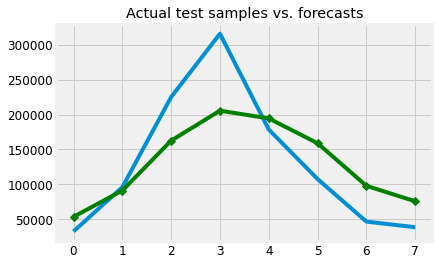

In [94]:
x = np.arange(test.shape[0])
# plt.scatter(x, test, marker='x')
plt.plot(x,test['presenze'])
plt.plot(x, result.predict(start=len(train), end=len(train) + len(test)-1),color='g',marker='D')
plt.title('Actual test samples vs. forecasts')
plt.show()

### MSE

In [28]:
from sklearn.metrics import mean_squared_error
#predictions=result.predict(n_periods=test.shape[0])
predictions=result.predict(start=len(train), end=len(train) + len(test)-1)
MSE_error = mean_squared_error(test, predictions)
print('Testing Mean Squared Error is {}'.format(np.sqrt(MSE_error)))
print('Testing Root Mean Squared Error is {}'.format((MSE_error)))

Testing Mean Squared Error is 54130.29084666263
Testing Root Mean Squared Error is 2930088387.144288


In [29]:
test

,presenze
Month,
2021-5,32530.0
2021-6,95928.0
2021-7,225212.0
2021-8,315968.0
2021-9,178615.0
2021-10,107616.0
2021-11,46617.0
2021-12,38548.0


In [30]:
predictions

2021-05-01     53450.180761
2021-06-01     91157.479015
2021-07-01    162716.947052
2021-08-01    205649.857555
2021-09-01    194578.615416
2021-10-01    158980.729564
2021-11-01     97889.466306
2021-12-01     75730.426045
Freq: MS, Name: predicted_mean, dtype: float64

In [31]:
y=y[1:]

In [32]:
len(y)

47

In [52]:
x=[ 'Maggio', 'Giugno', 'Luglio', 'Agosto'
                               , 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']

In [53]:
predictions=(result.predict(start=len(train), end=len(train) + len(test)-1)).tolist()
pres=pd.DataFrame(predictions,columns=['presenze'])
pres['mese']=x
pres

,presenze,mese
0,53450.180761,Maggio
1,91157.479015,Giugno
2,162716.947052,Luglio
3,205649.857555,Agosto
4,194578.615416,Settembre
5,158980.729564,Ottobre
6,97889.466306,Novembre
7,75730.426045,Dicembre


In [55]:
occupacy_rate=[]
for i in range (0,8):
    x=pres['presenze'][-len(test):].tolist()
    z=y['capacità_massima'].tolist()
    rate=(x[i]/z[i])
    occupacy_rate.append("{0:.0%}".format(rate))

In [56]:
occupacy_rate_reale=[]
for i in range (0,8):
    x=y['presenze'][-len(test):].tolist()
    z=y['capacità_massima'].tolist()
    rate=(x[i]/z[i])
    occupacy_rate_reale.append("{0:.0%}".format(rate))

[32530.0, 95928.0, 225212.0, 315968.0, 178615.0, 107616.0, 46617.0, 38548.0]

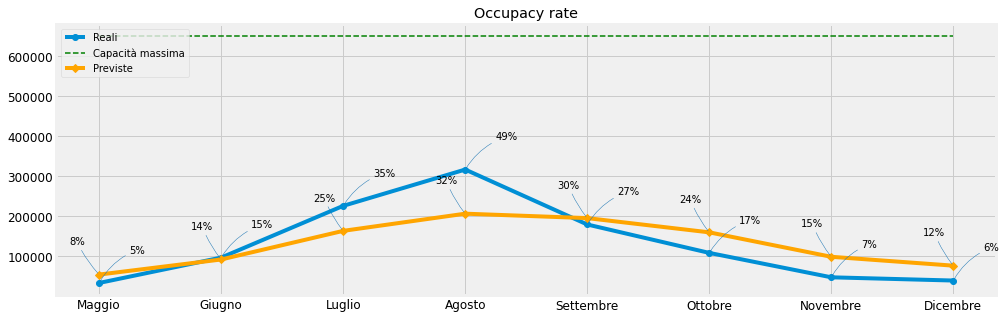

In [104]:
import matplotlib.pyplot as plt
import numpy as np
plt.grid(True)
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


x=[ 'Maggio', 'Giugno', 'Luglio', 'Agosto'
                               , 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
plt.ion()
fig, ax = plt.subplots()



plt.grid(True)

plt.plot(x,y['presenze'][-len(test):], label='Reali',marker='o')
plt.plot(x,y['capacità_massima'][-len(test):], 
         label='Capacità massima',color='g',linewidth=1.5,linestyle='--')
plt.plot(x,result.predict(start=len(train), end=len(train) + len(test)-1),label='Previste',marker='D',color='orange')
plt.title('Occupacy rate')
plt.legend(loc="upper left")
for i in range (0,8):
    ax.annotate((occupacy_rate[i]), xy=(pres['mese'][i:i+1],pres['presenze'][i:i+1]), xycoords='data',
            xytext=(-30,30), textcoords='offset points',
            arrowprops=dict(arrowstyle='-', color="tab:blue",
                            connectionstyle="arc3, rad=0.08"))   
    
    
for i in range (0,8):
    ax.annotate((occupacy_rate_reale[i]), xy=(pres['mese'][i:i+1],y['presenze'][-len(test):][i:i+1]),
                xycoords='data',
            xytext=(30,30), textcoords='offset points',
            arrowprops=dict(arrowstyle='-',color="tab:blue",
                            connectionstyle="arc3, rad=0.18"))     
    
plt.grid(True)

plt.show()

In [40]:
y['capacità_massima']= 650100

In [60]:
y

,presenze,capacità_massima
Month,,
2018-2,35341.0,650100
2018-3,56852.0,650100
2018-4,75258.0,650100
2018-5,129320.0,650100
2018-6,202543.0,650100
2018-7,255701.0,650100
2018-8,293724.0,650100
2018-9,201933.0,650100
2018-10,101822.0,650100
